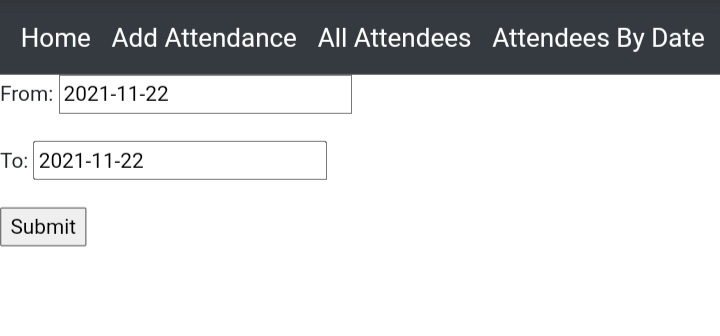

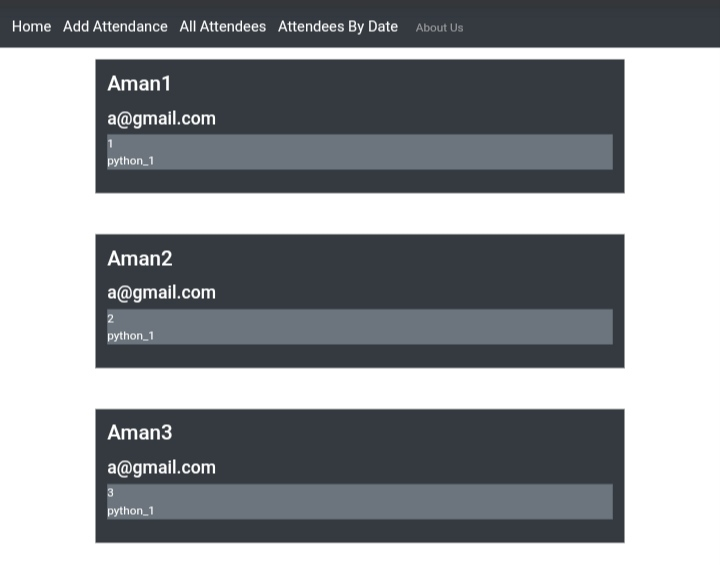

In [1]:
from django.shortcuts import render,redirect
from django.http import HttpResponse
from .form import MasterForm, DateForm
from .models import Masterdata_dummy
import time as t
# Create your views here.


def home(request):
    return render(request,"home.html")

def about(request):
    return render(request,"about.html")


def attend(request):
    form1 = MasterForm()
    if request.method == "POST":
        form1 = MasterForm(request.POST)
        if form1.is_valid():
            form1.save()
            return redirect("find_all")
    return render(request,"form.html",{"form":form1})

def find_all(request):
    data = Masterdata_dummy.objects.all()
    context = {'data':data}
    return render(request,"find_all.html",context)

def find_date(request):
    if request.method == "GET":
        form1 = DateForm()
        return render(request,"form.html",{"form":form1})
    if request.method == "POST":
        form1 = DateForm(request.POST)
        if form1.is_valid():
            t1 = form1.cleaned_data['From']
            t2 = form1.cleaned_data['To']
            t_range = [str(t1),str(t2)]
            
            data = Masterdata_dummy.objects.filter(date__range= t_range).all()
            return render(request,"find_all.html",{"form":data})
    #data = Masterdata_dummy.objects.all()
    #context = {'data':data}
    #return render(request,"find_all.html",context)
